# **Packages Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **Business & Data Understaning**

In [3]:
df=pd.read_excel("/content/drive/MyDrive/tp_ai/production/production.xlsx")
df.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [4]:
df.shape

(3304, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3304 non-null   datetime64[ns]
 1   Cumulative_solar_power  3304 non-null   float64       
 2   kWh electricity/day     3304 non-null   float64       
 3   Gas/day                 3304 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 103.4 KB


# **Data Preparation**

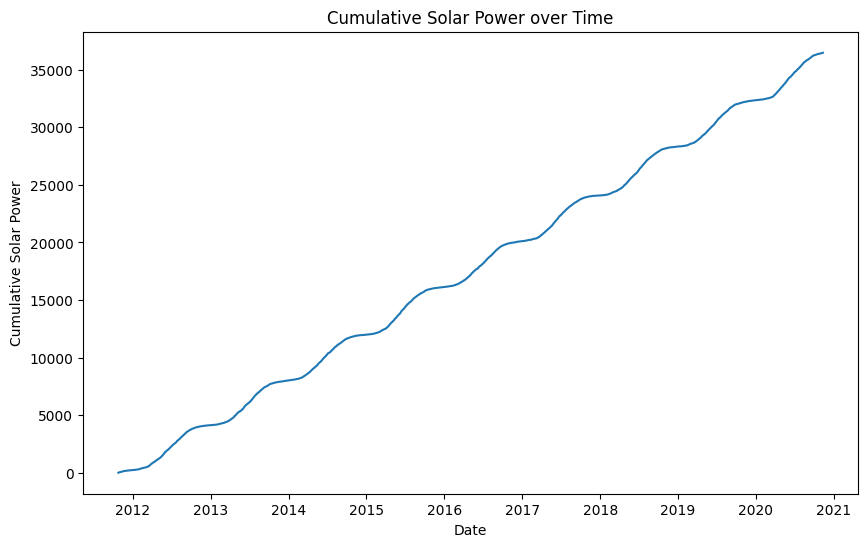

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['Cumulative_solar_power'])
plt.title('Cumulative Solar Power over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Solar Power')
plt.show()


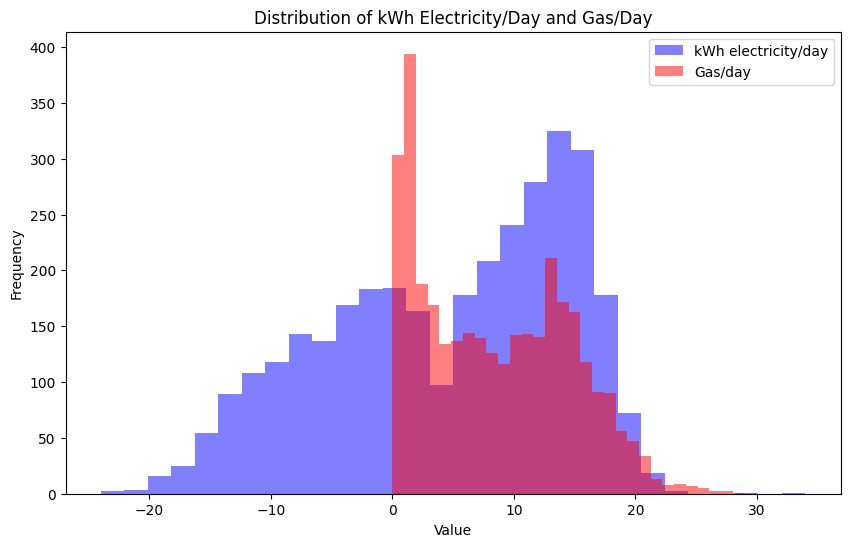

In [9]:
plt.figure(figsize=(10,6))

# Plotting 'kWh electricity/day' in blue
plt.hist(df['kWh electricity/day'], bins=30, color='blue', alpha=0.5, label='kWh electricity/day')

# Plotting 'Gas/day' in red
plt.hist(df['Gas/day'], bins=30, color='red', alpha=0.5, label='Gas/day')

plt.title('Distribution of kWh Electricity/Day and Gas/Day')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


In [21]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 2])
        y.append(data.iloc[i, 2])
    return x, y




In [22]:
training_size = int(len(df['kWh electricity/day'])*0.8)


In [23]:
x, y = load_data(df, 20)

In [24]:
x_train = np.array(x[:training_size])
y_train = np.array(y[:training_size])
x_test = np.array(x[training_size:])
y_test = np.array(y[training_size:])

In [25]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2643, 20)
y_train.shape =  (2643,)
x_test.shape =  (641, 20)
y_test.shape =  (641,)


In [26]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

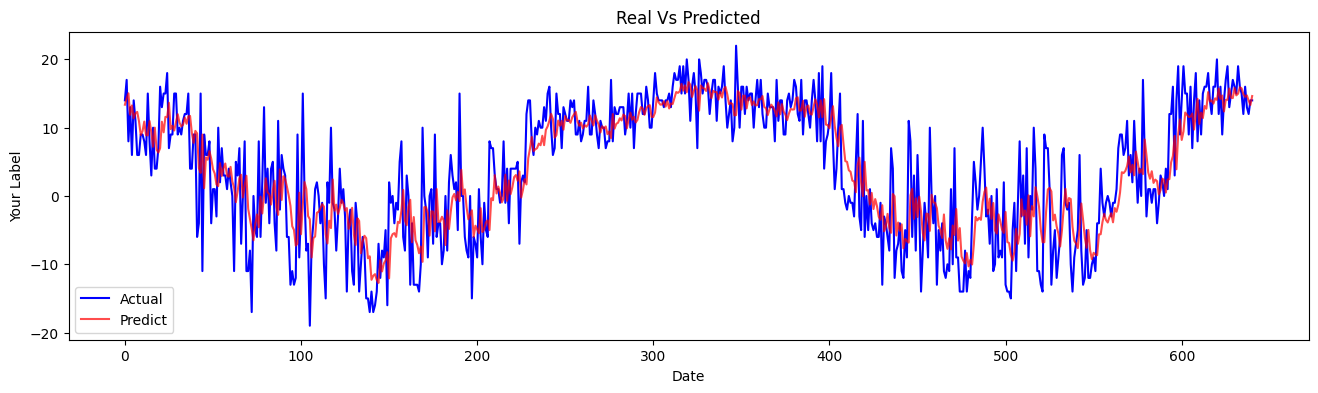

In [27]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Your Label')  # Adjusted label
plt.legend()
plt.show()


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 5.66
MAPE: inf


<ipython-input-28-964c798eaafd>:2: RuntimeWarning: divide by zero encountered in divide
  mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)
